### 목표: 2,30대의 심리 특성 알아보기(마키아벨리, 성격유형)
- 10/20/30/40/50~
- 다른 연령대에 비해 두드러지는 특성 찾아보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('data.csv')
df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1


<AxesSubplot:xlabel='age_group', ylabel='count'>

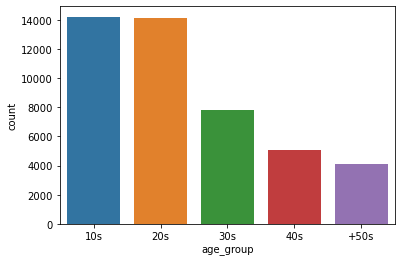

In [9]:
df.age_group=df.age_group.apply(lambda x:'+50s'if x in ['50s','60s','70s'] else x)
sns.countplot(x='age_group',data=df,order=['10s','20s','30s','40s','+50s'])

### Qb: 범죄자와 일반 사람들의 가장 큰 차이점은 범죄자들이 잡힐만큼 멍청하다는 것이다.(V+) 

In [77]:
pivot1=pd.pivot_table(df,values='index',index='QbA',columns='age_group',aggfunc='count',margins=True)
pivot1=pivot1.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot1

age_group,10s,20s,30s,40s,+50s
QbA,,,,,
1.0,2753,3854,2639,2044,2014
2.0,2275,2513,1540,875,604
3.0,1300,1399,687,391,265
4.0,3536,3201,1623,1032,682
5.0,4351,3145,1347,709,518
All,14215,14112,7836,5051,4083


In [78]:
pivot2=pivot1/pivot1.loc['All']*100
pivot2

age_group,10s,20s,30s,40s,+50s
QbA,,,,,
1.0,19.366866,27.310091,33.677897,40.467234,49.326476
2.0,16.004221,17.807540,19.652884,17.323302,14.793044
3.0,9.145269,9.913549,8.767228,7.741041,6.490326
4.0,24.875132,22.682823,20.712098,20.431598,16.703404
5.0,30.608512,22.285998,17.189893,14.036824,12.686750
All,100.000000,100.000000,100.000000,100.000000,100.000000


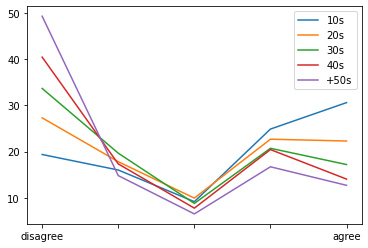

In [84]:
x=range(1,6)
for c in ['10s','20s','30s','40s','+50s']:
    y=pivot2.iloc[:5,:][c].values
    plt.plot(x,y,label=c)
    
plt.legend()
plt.xticks([1,2,3,4,5],['disagree','','','','agree'])
plt.show()

<strong> 연령대별로 무엇을 답했는지 분포</strong>
- 연령대가 높아질수록 해당 질문에 동의하지 않는 비율이 높아진다.
- 즉, 연령대가 높아질수록 범죄자들이 일반 사람들에 비해 멍청해서 잡히는 것이 아니라고 생각한다.
- 연령별 격차가 크다.

In [20]:
pivot3=pd.pivot_table(data=df,values='QbA',index='age_group',aggfunc=np.mean)
pivot3=pivot3.reindex(['10s','20s','30s','40s','+50s'],axis=0)
pivot3

,QbA
age_group,
10s,3.313542
20s,2.948271
30s,2.680832
40s,2.502475
+50s,2.286309


<AxesSubplot:xlabel='age_group', ylabel='QbA'>

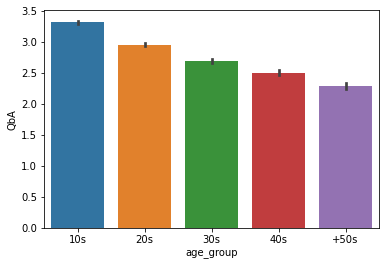

In [21]:
sns.barplot(x='age_group',y='QbA',data=df,order=['10s','20s','30s','40s','+50s'])

<strong>연령별 응답 평균 점수</strong>
- 연령대가 증가할수록 해당 질문의 평균 응답점수가 낮아진다.
- 연령대 증가할수록 해당 질문에 동의하지 않는다.

In [39]:
# 응답시간 데이터 편차 매우 크기 때문에 로그 변환
df['log_QbE']=np.log(df['QbE'])

In [40]:
df['log_QbE'].describe()

count    45532.000000
mean         7.180652
std          0.696401
min          3.218876
25%          6.774224
50%          7.104965
75%          7.516433
max         15.534770
Name: log_QbE, dtype: float64

<AxesSubplot:xlabel='log_QbE', ylabel='Count'>

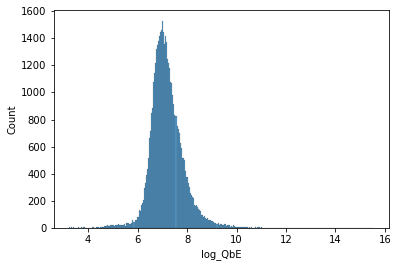

In [44]:
sns.histplot(df['log_QbE'])

<AxesSubplot:xlabel='QbA', ylabel='log_QbE'>

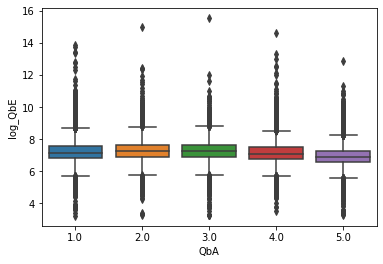

In [42]:
#무엇을 응답했는지에 따라 응답시간 차이가 있을까?
sns.boxplot(y='log_QbE',x='QbA',data=df)

<AxesSubplot:xlabel='age_group', ylabel='log_QbE'>

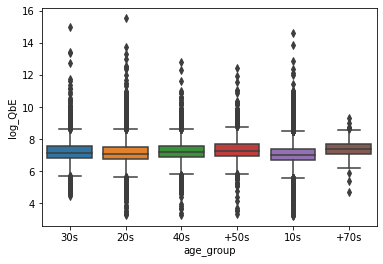

In [43]:
#연령대에 따라 응답시간 차이가 있을까? 
sns.boxplot(y='log_QbE',x='age_group',data=df)

<strong>연령별 평균 응답 시간</strong>
- 연령대에 따라 응답 시간에 큰 차이를 보이지 않는다

### Qc: 누군가를 완전히 믿는 사람은 고생을 자처하는 것이다.(T+)

In [23]:
pivot4=pd.pivot_table(df,values='index',index='QcA',columns='age_group',aggfunc='count',margins=True)
pivot4=pivot1.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot4

age_group,10s,20s,30s,40s,+50s
QcA,,,,,
1.0,1597,1535,1023,851,756
2.0,1943,1807,1108,703,568
3.0,1278,1137,575,331,261
4.0,3575,3697,2136,1382,1148
5.0,5822,5936,2994,1784,1350
All,14215,14112,7836,5051,4083


In [24]:
pivot5=pivot4/pivot4.loc['All']*100
pivot5

age_group,10s,20s,30s,40s,+50s
QcA,,,,,
1.0,11.234611,10.877268,13.055130,16.848149,18.515797
2.0,13.668660,12.804705,14.139867,13.918036,13.911340
3.0,8.990503,8.056973,7.337928,6.553158,6.392359
4.0,25.149490,26.197562,27.258806,27.360919,28.116581
5.0,40.956736,42.063492,38.208270,35.319739,33.063924
All,100.000000,100.000000,100.000000,100.000000,100.000000


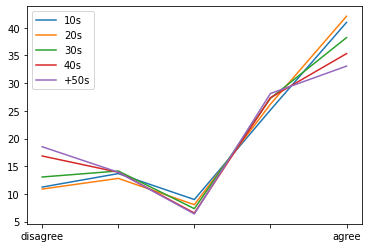

In [85]:
x=range(1,6)
for c in ['10s','20s','30s','40s','+50s']:
    y=pivot5.iloc[:5,:][c].values
    plt.plot(x,y,label=c)
    
plt.legend()
plt.xticks([1,2,3,4,5],['disagree','','','','agree'])
plt.show()

<strong> 연령대별로 무엇을 답했는지 분포</strong>
- 연령대가 높아질수록 해당 질문에 동의하지 않는다.
- 즉, 연령대가 높아질수록 완전히 신뢰하는 것이 고생을 자처한다고 보지 않는다.
- 위의 b질문보다는 연령별 편차가 작긴하지만, 1020/30/4050이 확실히 차이를 보이긴 한다. 

In [68]:
pivot6=pd.pivot_table(data=df,values='QbA',index='age_group',aggfunc=np.mean)
pivot6=pivot6.reindex(['10s','20s','30s','40s','+50s'],axis=0)
pivot6

,QbA
age_group,
10s,3.313542
20s,2.948271
30s,2.680832
40s,2.502475
+50s,2.286309


<AxesSubplot:xlabel='age_group', ylabel='QcA'>

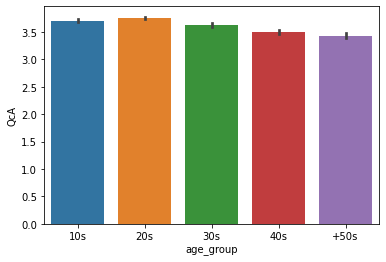

In [27]:
sns.barplot(x='age_group',y='QcA',data=df,order=['10s','20s','30s','40s','+50s'])

<strong>연령별 응답 평균 점수</strong>
- 연령대가 증가할수록 해당 질문의 평균 응답점수가 낮아진다.
- 연령대 증가할수록 해당 질문에 동의하지 않는다.

In [45]:
df['log_QcE']=np.log(df['QcE'])

In [46]:
df['log_QcE'].describe()

count    45532.000000
mean         6.881806
std          0.671171
min          3.218876
25%          6.478510
50%          6.801283
75%          7.196687
max         13.678037
Name: log_QcE, dtype: float64

<AxesSubplot:xlabel='log_QcE', ylabel='Count'>

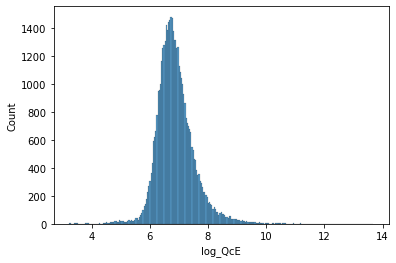

In [47]:
sns.histplot(df['log_QcE'])

<AxesSubplot:xlabel='QcA', ylabel='log_QcE'>

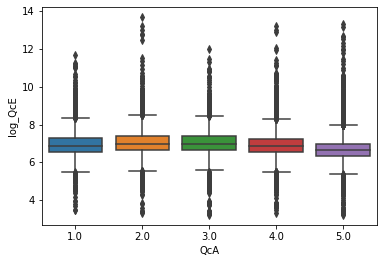

In [48]:
#무엇을 응답했는지에 따라 응답시간 차이가 있을까?
sns.boxplot(y='log_QcE',x='QcA',data=df)

<AxesSubplot:xlabel='age_group', ylabel='log_QcE'>

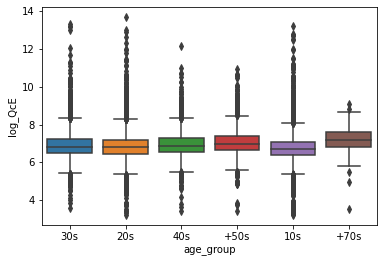

In [49]:
#연령대에 따라 응답시간 차이가 있을까? 
sns.boxplot(y='log_QcE',x='age_group',data=df)

<strong>연령별 평균 응답 시간</strong>
- 연령대에 따라 응답 시간에 큰 차이를 보이지 않는다

In [51]:
#7에 가까울수록 agree strongly, 0이 무응답으로 변환
df['tp01']=7-df['tp01']
df['tp02']=7-df['tp02']
df['tp03']=7-df['tp03']
df['tp04']=7-df['tp04']
df['tp05']=7-df['tp05']
df['tp06']=7-df['tp06']
df['tp07']=7-df['tp07']
df['tp08']=7-df['tp08']
df['tp09']=7-df['tp09']
df['tp10']=7-df['tp10']

### tp01: 외향적인, 열정적인

In [54]:
pivot7=pd.pivot_table(df,values='index',index='tp01',columns='age_group',aggfunc='count',margins=True)
pivot7=pivot7.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot7

age_group,10s,20s,30s,40s,+50s
tp01,,,,,
0,54,44,33,49,83
1,1896,1901,1095,673,457
2,2478,2539,1392,820,674
3,1861,1935,1045,583,460
4,1155,1136,687,400,299
5,2504,2436,1332,908,662
6,2771,2699,1455,1087,953
7,1496,1422,797,531,495
All,14215,14112,7836,5051,4083


In [62]:
pivot8=pivot7/pivot7.loc['All']*100
pivot8.drop([0],axis=0,inplace=True)
pivot8

age_group,10s,20s,30s,40s,+50s
tp01,,,,,
1,13.338023,13.470805,13.973966,13.324094,11.192750
2,17.432290,17.991780,17.764165,16.234409,16.507470
3,13.091804,13.711735,13.335886,11.542269,11.266226
4,8.125220,8.049887,8.767228,7.919224,7.323047
5,17.615195,17.261905,16.998469,17.976638,16.213568
6,19.493493,19.125567,18.568147,21.520491,23.340681
7,10.524094,10.076531,10.171006,10.512770,12.123439
All,100.000000,100.000000,100.000000,100.000000,100.000000


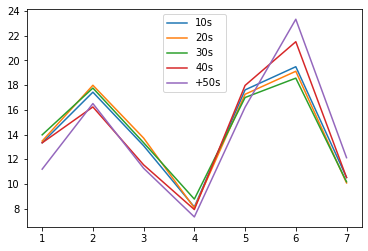

In [63]:
x=range(1,8)
for c in ['10s','20s','30s','40s','+50s']:
    y=pivot8.iloc[:7,:][c].values
    plt.plot(x,y,label=c)
    
plt.legend()
plt.show()

<strong> 연령대별로 성격 분포</strong>
- 낮은 연령대일수록 외향성에 대해 낮은 점수, 높은 연령대일수록 높은 점수를 갖는다. 
- 차이가 크게 나타나진 않는다. 

In [71]:
#무응답제외
df_01=df[df['tp01']!=0]
pivot9=pd.pivot_table(data=df_01,values='tp01',index='age_group',aggfunc=np.mean)
pivot9=pivot9.reindex(['10s','20s','30s','40s','+50s'],axis=0)
pivot9

,tp01
age_group,
10s,4.002048
20s,3.956213
30s,3.938357
40s,4.086565
+50s,4.218500


<AxesSubplot:xlabel='age_group', ylabel='tp01'>

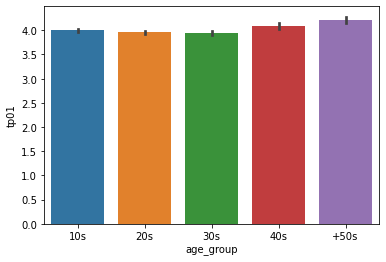

In [72]:
sns.barplot(x='age_group',y='tp01',data=df_01,order=['10s','20s','30s','40s','+50s'])

<strong> 연령대별로 평균 성격 점수</strong>
- 높은 연령대일수록 외향적이고 열정적이다. 

### tp02: 비판적인, 싸우려 드는

In [60]:
pivot10=pd.pivot_table(df,values='index',index='tp02',columns='age_group',aggfunc='count',margins=True)
pivot10=pivot10.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot10

age_group,10s,20s,30s,40s,+50s
tp02,,,,,
0,74,56,30,48,86
1,814,1154,901,756,931
2,1250,1460,988,849,747
3,1231,1230,794,515,409
4,1472,1170,637,369,260
5,3963,3925,2179,1386,999
6,3223,3194,1486,798,481
7,2188,1923,821,330,170
All,14215,14112,7836,5051,4083


In [64]:
pivot11=pivot10/pivot10.loc['All']*100
pivot11.drop([0],axis=0,inplace=True)
pivot11

age_group,10s,20s,30s,40s,+50s
tp02,,,,,
1,5.726345,8.177438,11.498213,14.967333,22.801861
2,8.793528,10.345805,12.608474,16.808553,18.295371
3,8.659866,8.715986,10.132721,10.196001,10.017144
4,10.355259,8.290816,8.129148,7.305484,6.367867
5,27.879001,27.813209,27.807555,27.440111,24.467303
6,22.673233,22.633220,18.963757,15.798852,11.780554
7,15.392191,13.626701,10.477284,6.533360,4.163605
All,100.000000,100.000000,100.000000,100.000000,100.000000


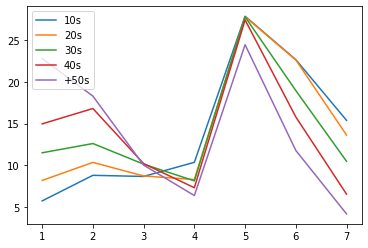

In [66]:
x=range(1,8)
for c in ['10s','20s','30s','40s','+50s']:
    y=pivot11.iloc[:7,:][c].values
    plt.plot(x,y,label=c)
    
plt.legend()
plt.show()

<strong> 연령대별로 성격 분포</strong>
- 낮은 연령대일수록 비판적이고, 싸우기 좋아하는 성격이다. 
- 연령별 격차가 확연하게 벌어진다.

In [73]:
#무응답제외
df_02=df[df['tp02']!=0]
pivot10=pd.pivot_table(data=df_02,values='tp02',index='age_group',aggfunc=np.mean)
pivot10=pivot10.reindex(['10s','20s','30s','40s','+50s'],axis=0)
pivot10

,tp02
age_group,
10s,4.763737
20s,4.602590
30s,4.274276
40s,3.898261
+50s,3.443332


<AxesSubplot:xlabel='age_group', ylabel='tp02'>

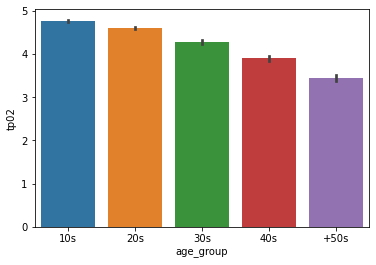

In [75]:
sns.barplot(x='age_group',y='tp02',data=df_02,order=['10s','20s','30s','40s','+50s'])

<strong> 연령대별로 평균 성격 점수</strong>
- 낮은 연령대일수록 비판적이고, 싸우기 좋아하는 성향이 두드러진다.

In [ ]:
#나이에 따라 유독 두드러지는 특성들에는 뭐가 있을까? 
#그래서 2030 심리는 어떨까? 

##### 주제에 대해 대강 생각해본 것들?
- 각자 해온 것: 연령대에 비해 2,30대에서 두드러지는 심리성향에는 무엇이 있을까?
- 2,30대에서 특히 높게 나타난다기 보다는 연령대가 높아짐에 따라 or 낮아짐에 따라
- 해보니까 연령대에 따라 크게 응답이 달라지는 질문도 있고, 아닌 것도 있음.
> <strong>어떤 특성의 성격이 더 환경적 요인의 영향을 받기 쉬운가?</strong> <br>
> - 성격=생물학적 요소(유전적요인)+환경적 요소
> 1. 성격 유형 중에 환경적 요인에 의해 변화하기 쉬운 유형은 무엇이 있을까?<br>
> or 생물학적으로 내재되어 변하기 어려운 성격 특성은 무엇인가?
> 2. 마키아벨리 성향은 환경적으로 영향을 얼마나 받는가?<br>
> or 여러가지 마키아벨리 질문 중에 환경적으로 영향을 받는 질문들은 무엇이 있을까?

<환경적요인> <br>
-> 얘네에 따라 성격 특성이나 마키아벨리 성향이 다르게 유의한 차이를 보이는가? <br>
if 유의한 차이 보인다면 그 성격 유형은 이러한 환경적 요인에 받는 영향이 크다
- 교육수준
- 형제자매수
- 결혼유무
- 종교
- 유년기 거주지역

<유전적>
- 모국어가 영어
- 성별
- 오른손잡이, 왼손잡이..?
- 인종..?